# 宏观经济学

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_excel('bop.xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,中国国际收支平衡表（年度表）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,单位:亿元人民币,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,项目,2010,2011,2012,2013,2014,2015,2016,2017.0,2018.0,2019.0,2020.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2. 根据《国际收支和国际投资头寸手册》（第六版）编制，资本和金融账户中包含储备资产。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,3.“贷方”按正值列示，“借方”按负值列示，差额等于“贷方”加上“借方”。本表除标注“贷方”...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,4. 金融账户下，对外金融资产的净增加用负值列示，净减少用正值列示。对外负债的净增加用正值列...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,5. 年度人民币计值的国际收支平衡表由单季人民币计值数据累加得到。季度人民币计值的国际收支平...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.loc[4:5]

,0,1,2,3,4,5,6,7,8,9,10,11
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1. 经常账户,16043.3,8735.74,13601.9,9190.29,14516,18265.7,12637.8,12684.59029,1881.742404,7115.964257,18708.632951


In [4]:
def getDf(df, ids):
    data = {}
    for n in ids:
        data[df.loc[n, 0:1].values[0]] = df.loc[n, 1:].values
    return pd.DataFrame(data, index=df.loc[3, 1:].values)
bop = getDf(df, [5, 74, 135])
bop

,1. 经常账户,2. 资本和金融账户,3.净误差与遗漏
2010.0,16043.3,-12488,-3555.24
2011.0,8735.74,-7893.44,-842.296
2012.0,13601.9,-8106.6,-5495.31
2013.0,9190.29,-5331.43,-3858.87
2014.0,14516,-10393.8,-4122.18
2015.0,18265.7,-5652.62,-12613.1
2016.0,12637.8,1950.86,-14588.6
2017.0,12684.6,1211.84,-13896.4
2018.0,1881.74,9901.17,-11782.9
2019.0,7115.96,1799.89,-8915.86


<AxesSubplot:>

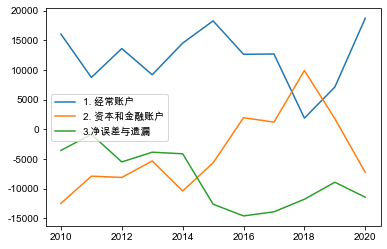

In [5]:
bop.plot()

# 时间序列分析

/Users/thales/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.00426245, -0.27289365, -0.28428044, -0.25180558])

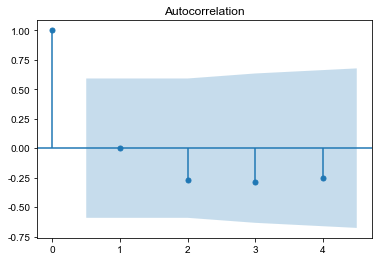

In [6]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
fig, ax = plt.subplots()
tsaplots.plot_acf(bop["1. 经常账户"], lags=4, ax=ax)
stattools.acf(bop["1. 经常账户"], nlags=4)

array([ 1.        ,  0.00468869, -0.333566  , -0.43572626, -0.77552683])

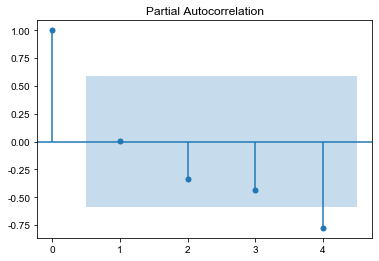

In [7]:
fig, ax = plt.subplots()
tsaplots.plot_pacf(bop["1. 经常账户"], lags=4, ax=ax)
stattools.pacf(bop["1. 经常账户"], nlags=4)

# 按照季度

In [8]:
season = pd.read_excel('bop.xlsx', '季度BOP（人民币）', header=None)
season

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,中国国际收支平衡表（季度表）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,单位:亿元人民币,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,项目,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,...,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2. 根据《国际收支和国际投资头寸手册》（第六版）编制，资本和金融账户中包含储备资产。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,3.“贷方”按正值列示，“借方”按负值列示，差额等于“贷方”加上“借方”。本表除标注“贷方”...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,4. 金融账户下，对外金融资产的净增加用负值列示，净减少用正值列示。对外负债的净增加用正值列...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,5. 季度人民币计值的国际收支平衡表数据，由当季以美元计值的国际收支平衡表，通过当季人民币对...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
seasondf = getDf(season, [5, 74, 135])
seasondf

,1. 经常账户,2. 资本和金融账户,3.净误差与遗漏
2010Q1,1706.41,-1611.16,-95.2495
2010Q2,2986.26,-2090.06,-896.196
2010Q3,5596.2,-5216.02,-380.177
2010Q4,5754.42,-3570.8,-2183.62
2011Q1,98.8883,-2037.65,1938.76
2011Q2,2842.81,-1841.92,-1000.89
2011Q3,2723.18,-1372.31,-1350.88
2011Q4,3070.86,-2641.56,-429.294
2012Q1,1801.94,-1879.34,77.4037
2012Q2,3721.65,-751.992,-2969.65


<AxesSubplot:>

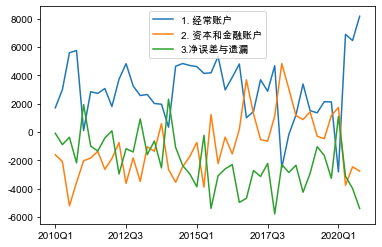

In [10]:
seasondf.plot()

/Users/thales/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.21747253,  0.01938671, -0.12371998,  0.08297988,
       -0.00921706, -0.034952  , -0.00280776,  0.11507008, -0.30064707,
       -0.23241952, -0.18646485,  0.07872667])

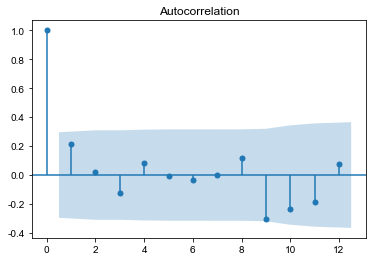

In [11]:
fig, ax = plt.subplots()
tsaplots.plot_acf(seasondf["1. 经常账户"], lags=12, ax=ax)
stattools.acf(seasondf["1. 经常账户"], nlags=12)

array([ 1.        ,  0.22253003, -0.03073154, -0.13752611,  0.16289617,
       -0.07235077, -0.05251894,  0.06725959,  0.11236781, -0.50987749,
       -0.08059272, -0.09221924,  0.0172753 ])

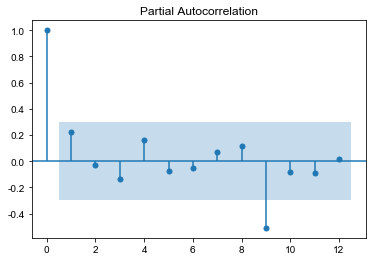

In [12]:
fig, ax = plt.subplots()
tsaplots.plot_pacf(seasondf["1. 经常账户"], lags=12, ax=ax)
stattools.pacf(seasondf["1. 经常账户"], nlags=12)